In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('Compiled_descriptors.csv')



In [3]:
df=df.iloc[:,1:]

In [4]:
df

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class
0,359.4,8.357,28.24,0.657,1.034,0.658,1.123,0.083,7.0,15.0,...,0.845,-2.11,0.83,0.83,0.7,0.67,0.61,0.17,0.88,0
1,368.4,7.839,30.56,0.650,1.017,0.667,1.115,0.080,6.0,16.0,...,0.880,-2.87,1.00,1.00,0.6,1.00,0.80,0.33,1.00,1
2,370.5,6.501,33.76,0.592,0.992,0.636,1.124,0.080,8.0,10.0,...,0.886,-5.32,0.83,1.00,1.0,1.00,0.94,0.17,0.88,2
3,249.3,7.334,22.23,0.654,0.988,0.694,1.117,0.123,0.0,17.0,...,1.018,-4.72,1.00,1.00,0.6,1.00,0.87,0.67,1.00,2
4,269.8,8.702,21.53,0.694,1.002,0.732,1.113,0.123,1.0,17.0,...,1.023,-4.95,1.00,1.00,0.6,1.00,0.76,0.83,1.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,304.3,8.949,23.16,0.681,1.047,0.669,1.116,0.104,6.0,13.0,...,0.841,-1.32,1.00,1.00,0.4,1.00,0.77,0.33,1.00,2
565,365.6,7.947,30.42,0.661,0.984,0.729,1.104,0.093,2.0,15.0,...,1.023,-4.75,1.00,1.00,0.8,1.00,0.90,0.33,1.00,1
566,265.4,6.805,24.28,0.623,0.984,0.669,1.123,0.116,4.0,16.0,...,1.000,-3.84,1.00,1.00,0.8,1.00,0.90,1.00,1.00,0
567,292.3,8.119,21.45,0.596,1.056,0.583,1.155,0.100,8.0,4.0,...,0.769,-0.24,0.67,0.83,0.9,0.67,0.72,0.33,0.75,2


In [5]:
a=abs(df.corr()['Class']).sort_values(ascending=False).head(30).index.tolist()
print(a)

['Class', 'C-005', 'C-016', 'MATS2p', 'MATS2i', 'GATS2i', 'SdsCH', 'GATS2p', 'CATS2D_04_DA', 'PCR', 'T(O..F)', 'Eig02_EA(dm)', 'Chi1_EA(dm)', 'P_VSA_s_4', 'MATS2m', 'rGes', 'VE3sign_Dz(p)', 'VE3sign_D/Dt', 'MATS2v', 'T(F..F)', 'SpDiam_AEA(bo)', 'nR=Cs', 'SpMax8_Bh(s)', 'DBI', 'P_VSA_e_2', 'P_VSA_i_2', 'MCD', 'P_VSA_v_3', 'SpMAD_EA(dm)', 'SM02_EA(dm)']


In [6]:
df_train=df[a]

In [7]:
abs(df.corr()['Class']).sort_values(ascending=False).head(20)

Class            1.000000
C-005            0.332119
C-016            0.311954
MATS2p           0.299658
MATS2i           0.280997
GATS2i           0.278562
SdsCH            0.266876
GATS2p           0.262576
CATS2D_04_DA     0.256093
PCR              0.248253
T(O..F)          0.244306
Eig02_EA(dm)     0.237744
Chi1_EA(dm)      0.231772
P_VSA_s_4        0.231527
MATS2m           0.223484
rGes             0.221581
VE3sign_Dz(p)    0.218329
VE3sign_D/Dt     0.216734
MATS2v           0.213380
T(F..F)          0.211714
Name: Class, dtype: float64

In [11]:
def sepration(col):
    l=[]
    mask1=df['Class']==0
    mask2=df['Class']==1
    mask3=df['Class']==2
    
    if df[mask1][col].quantile(0.75)<=df[mask2][col].quantile(0.25):
      if df[mask2][col].quantile(0.75)<= df[mask3][col].quantile(.25):
         l.append(df.columns[i])
    return l           

In [12]:
lst=[]
for i in range(20,738):
    lst=sepration(df.columns[i])

In [13]:
lst

['Class']

In [14]:
df.describe()

,MW,AMW,Sv,Mv,Me,Mp,Mi,GD,nTA,nBM,...,PDI,BLTF96,DLS_02,DLS_03,DLS_04,DLS_06,DLS_cons,LLS_01,LLS_02,Class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,406.672408,7.883752,33.607478,0.641497,1.009545,0.676046,1.122170,0.083989,4.465729,17.940246,...,0.946508,-3.823814,0.858049,0.904938,0.685589,0.905009,0.788067,0.352162,0.888049,1.247803
std,136.166522,1.077506,12.472866,0.080118,0.019822,0.031323,0.013076,0.026049,2.746823,5.217112,...,0.127263,1.126739,0.216475,0.162043,0.188404,0.182261,0.133152,0.212827,0.163152,0.830810
min,123.100000,5.666000,0.000000,0.000000,0.976000,0.554000,1.086000,0.020000,0.000000,0.000000,...,0.000000,-6.700000,0.000000,0.330000,0.100000,0.170000,0.170000,0.000000,0.370000,0.000000
25%,322.400000,7.118000,26.300000,0.626000,0.995000,0.658000,1.115000,0.068000,3.000000,15.000000,...,0.919000,-4.650000,0.670000,0.830000,0.600000,0.830000,0.740000,0.170000,0.750000,0.000000
50%,375.500000,7.684000,31.200000,0.650000,1.005000,0.672000,1.121000,0.082000,4.000000,18.000000,...,0.964000,-3.900000,1.000000,1.000000,0.600000,1.000000,0.800000,0.330000,1.000000,1.000000
75%,459.600000,8.482000,38.060000,0.671000,1.018000,0.692000,1.128000,0.099000,6.000000,20.000000,...,1.003000,-3.160000,1.000000,1.000000,0.800000,1.000000,0.880000,0.500000,1.000000,2.000000
max,1519.000000,16.970000,132.000000,0.803000,1.082000,0.903000,1.172000,0.250000,18.000000,46.000000,...,1.119000,1.130000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


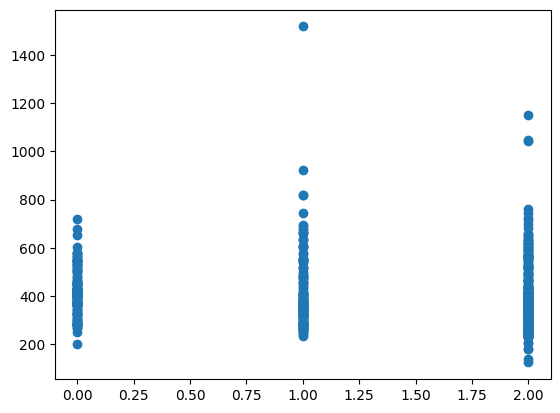

In [15]:
plt.scatter(x=df['Class'],y=df['MW'])

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score


In [17]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [18]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [21]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10)

In [22]:
model = RandomForestClassifier()

In [23]:
x=df_train.drop(['Class', 'MATS2m','GATS2i','GATS2p'],axis=1)
x=x.iloc[:,4:]
y=df_train['Class']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)

In [43]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [44]:
accuracy_score(y_pred,y_test)

0.6666666666666666

In [27]:
np.mean(cross_val_score(rf_RandomGrid,x,y,cv=25,scoring='accuracy'))

c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Akshat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

0.6222134387351779

In [28]:
x.columns.to_list()

['SdsCH',
 'CATS2D_04_DA',
 'PCR',
 'T(O..F)',
 'Eig02_EA(dm)',
 'Chi1_EA(dm)',
 'P_VSA_s_4',
 'rGes',
 'VE3sign_Dz(p)',
 'VE3sign_D/Dt',
 'MATS2v',
 'T(F..F)',
 'SpDiam_AEA(bo)',
 'nR=Cs',
 'SpMax8_Bh(s)',
 'DBI',
 'P_VSA_e_2',
 'P_VSA_i_2',
 'MCD',
 'P_VSA_v_3',
 'SpMAD_EA(dm)',
 'SM02_EA(dm)']

In [29]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import seaborn as sns

C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\2247656729.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GATS2p'],hist=False)
C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\2247656729.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GATS2i'],hist=False)


<Axes: xlabel='GATS2i', ylabel='Density'>

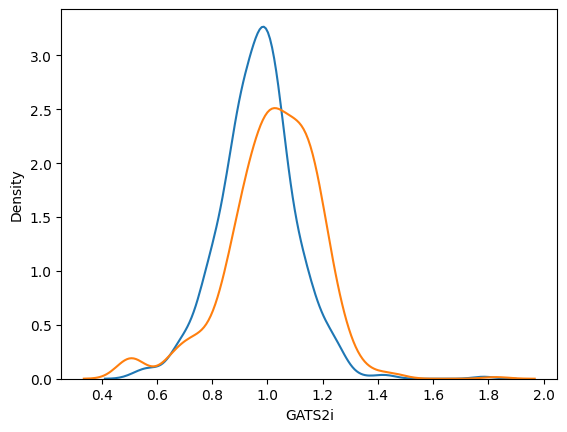

In [31]:
sns.distplot(df['GATS2p'],hist=False)
sns.distplot(df['GATS2i'],hist=False)


In [32]:
mask=df['C-016']==2
mask1=df['C-016']==0

In [33]:
#df[mask]['Class'].value_counts()
df[mask1]['Class'].value_counts()

Class
2    132
1     67
0     37
Name: count, dtype: int64

In [34]:
df[mask]['Class'].value_counts()

Class
2    71
1    31
0    28
Name: count, dtype: int64

In [35]:
df_train['C-016_005']=df_train['C-005']+df_train['C-016']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\110962180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['C-016_005']=df_train['C-005']+df_train['C-016']


In [36]:
df_train['Class'].corr(df_train['C-016_005'])

-0.3916692877018843

In [37]:
df_train['MATS']= (df_train['MATS2p']+df_train['MATS2i']+df_train['MATS2m'])*df_train['DBI']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\4206036059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['MATS']= (df_train['MATS2p']+df_train['MATS2i']+df_train['MATS2m'])*df_train['DBI']


In [38]:
df_train['GATS']=(df_train['GATS2p']+df_train['GATS2i']+df_train['MCD'])

C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\2687678690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['GATS']=(df_train['GATS2p']+df_train['GATS2i']+df_train['MCD'])


In [39]:
df_train['Class'].corr(df_train['GATS'])

0.3533194917898082

In [40]:
df_train['Class'].corr(df_train['MATS'])

-0.31638767592881967

In [41]:
df_train['DBI'].corr(df_train['Class'])

-0.20717746747464522

C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\910696650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['MCD'])


<Axes: xlabel='MCD', ylabel='Density'>

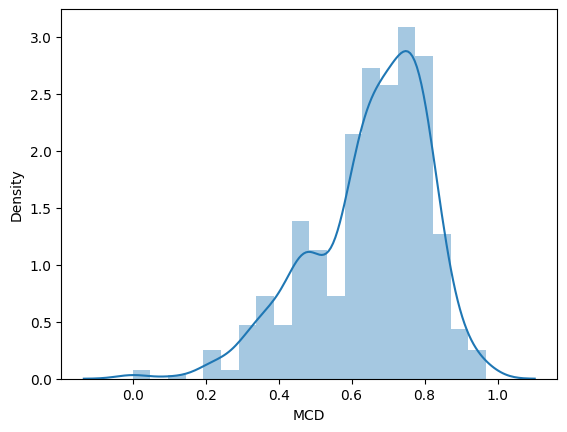

In [42]:
sns.distplot(df_train['MCD'])



In [5]:
df['GATSp']=df['GATS2p']/ (df['GATS5p']**df['GATS6p'])
df['GATSp'].corr(df['Class'])

0.2926066973264816

In [171]:
df['GATSp'].corr(df['Class'])
df_train['GATSp']=df['GATSp']


C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\3122811547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['GATSp']=df['GATSp']


,Class,C-005,C-016,MATS2p,MATS2i,GATS2i,SdsCH,GATS2p,CATS2D_04_DA,PCR,...,P_VSA_e_2,P_VSA_i_2,MCD,P_VSA_v_3,SpMAD_EA(dm),SM02_EA(dm),C-016_005,MATS,GATS,GATSp
0,0,0.0,2.0,-0.163,-0.160,1.302,2.440,1.243,0.0,1.379,...,90.33,90.33,0.462,90.33,0.265,2.513,2.0,-1.316000,3.007,1.252612
1,1,2.0,5.0,0.060,0.048,0.992,6.848,0.967,1.0,1.569,...,148.00,148.00,0.444,148.00,0.123,1.376,7.0,0.548000,2.403,1.014332
2,2,0.0,4.0,0.072,0.057,1.041,8.184,1.025,3.0,1.324,...,123.70,123.70,0.370,123.70,0.282,2.265,4.0,1.544048,2.436,1.098434
3,2,0.0,0.0,-0.083,0.049,1.015,0.000,1.023,1.0,1.502,...,108.80,108.80,0.842,108.80,0.038,0.278,0.0,-0.283972,2.880,1.032638
4,2,0.0,0.0,-0.151,0.041,1.019,0.000,0.995,1.0,1.504,...,100.30,100.30,0.842,139.40,0.063,0.623,0.0,-0.193011,2.856,1.068031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2,0.0,0.0,-0.128,-0.143,1.211,0.000,1.178,4.0,1.334,...,64.13,64.13,0.727,64.13,0.220,2.090,0.0,-0.650676,3.116,1.201278
565,1,0.0,3.0,0.082,-0.040,1.101,6.658,0.853,0.0,1.518,...,201.40,137.00,0.720,201.40,0.591,3.833,3.0,0.621000,2.674,0.629120
566,0,4.0,0.0,0.375,0.361,0.774,0.000,0.568,0.0,1.504,...,114.90,114.90,0.700,114.90,0.145,1.072,4.0,2.781000,2.042,0.581630
567,2,0.0,0.0,-0.103,-0.119,1.426,0.000,1.202,0.0,1.061,...,16.27,16.27,0.000,16.27,1.178,3.672,0.0,-0.925911,2.628,1.344339


C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\955559319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['GATSp'],hist=False)
C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\955559319.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['GATS'],hist=

<Axes: xlabel='GATS', ylabel='Density'>

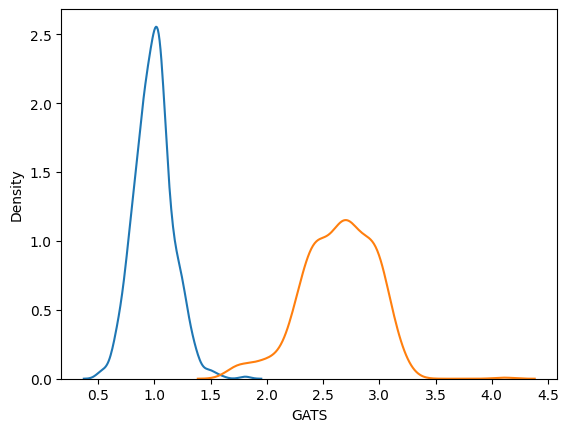

In [173]:
sns.distplot(df_train['GATSp'],hist=False)
sns.distplot(df_train['GATS'],hist=False)
#sns.distplot(df['GATS5p'],hist=False)
#sns.distplot(df['GATS6p'],hist=False)


In [174]:
df_train['GATS_p']=df_train['GATS']+df_train['GATSp']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_18304\2943899134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['GATS_p']=df_train['GATS']+df_train['GATSp']


In [1]:
df_train['Class'].corr(df_train['GATS'])

NameError: name 'df_train' is not defined

In [10]:
pip install -U ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install ydata_profiling.pkg_resources

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ydata_profiling.pkg_resources (from versions: none)
ERROR: No matching distribution found for ydata_profiling.pkg_resources


In [15]:
conda env create -n ydata-profiling conda activate ydata-profiling conda install -c conda-forge ydata-profiling


ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.